In [22]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
Path = '/content/drive/MyDrive/Colab Notebooks/insurance (1).csv'
df = pd.read_csv(Path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [24]:
df.shape

(1338, 7)

In [25]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Analysis on age Column**

In [27]:
print("Min    - ",df['age'].min())
print("max    - ",df['age'].max())
print('mean    -',df['age'].mean())
print("Median - ", df['age'].median())
print("Std    - ", df['age'].std())

Min    -  18
max    -  64
mean    - 39.20702541106129
Median -  39.0
Std    -  14.049960379216154


-> Here the mean and median are almost similar so there may not be outliers.

<Axes: >

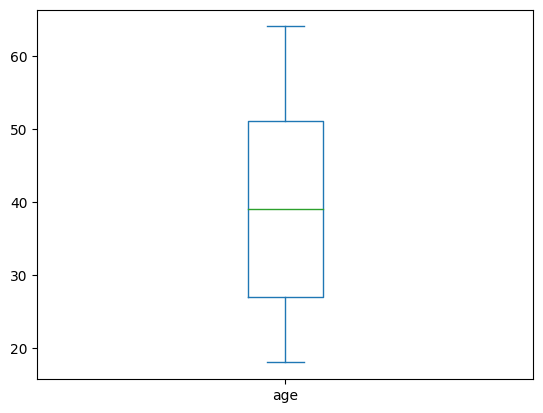

In [28]:
df['age'].plot(kind='box')

->The above box plot confirmed that there is no outliers in age column.

<Axes: ylabel='Density'>

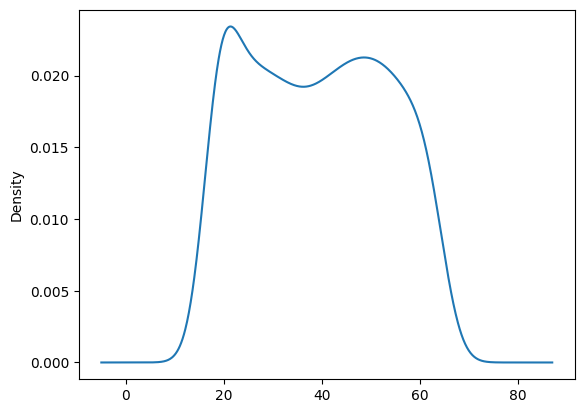

In [29]:
df['age'].plot(kind='kde')

-> By the above distribution graph we can say that it is not symmetric.

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([18, 18, 18, ..., 64, 64, 64])),
 (13.691231670122331, 39.20702541106129, 0.9727343971101687))

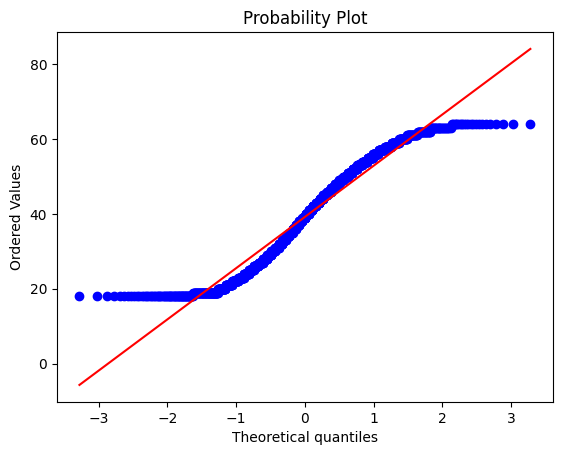

In [30]:
stats.probplot(df['age'],dist='norm',plot=plt)

-> coming to QQ plot even mea and median are similar and box plot shows that there is no outliers in age column ,the QQ plot shows that age column is not normally distributed.

**Analysing on bmi column**


In [31]:
print("Min    - ",df['bmi'].min())
print("max    - ",df['bmi'].max())
print('mean    -',df['bmi'].mean())
print("Median - ", df['bmi'].median())
print("Std    - ", df['bmi'].std())

Min    -  15.96
max    -  53.13
mean    - 30.66339686098655
Median -  30.4
Std    -  6.098186911679014


-> Here mean and median both are slightly different, so there may be a chances of having outliers in bmi column.

<Axes: >

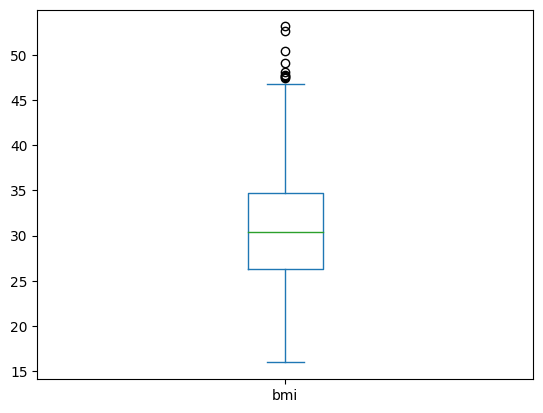

In [32]:
df['bmi'].plot(kind = 'box')

-> The above box plot shows that bmi column having outliers.

<Axes: ylabel='Density'>

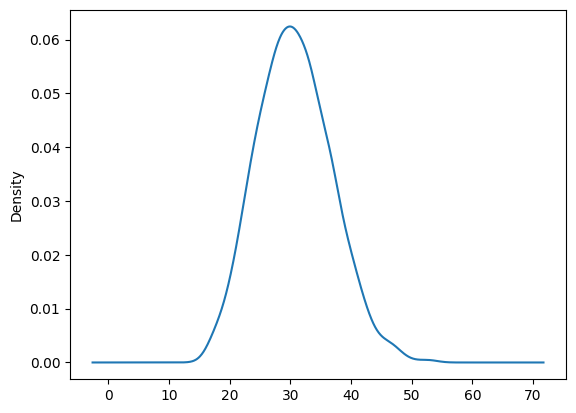

In [33]:
df['bmi'].plot(kind = 'kde')

-> coming to kde plot bmi column is also not symmetric.

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([15.96 , 16.815, 16.815, ..., 50.38 , 52.58 , 53.13 ])),
 (6.091222472679125, 30.66339686098655, 0.997081328942097))

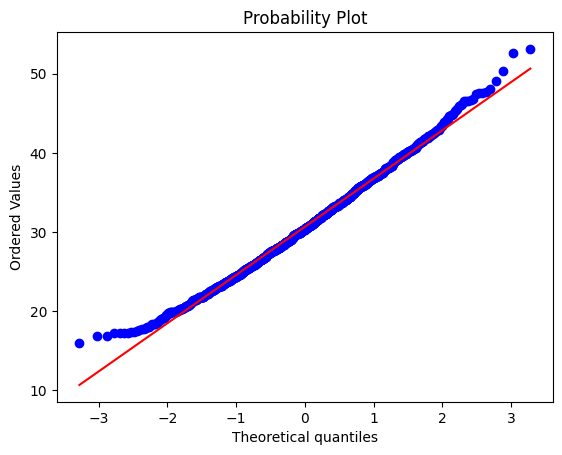

In [34]:
stats.probplot(df['bmi'],dist='norm',plot=plt)

**outlier treatment**

In [35]:
df.shape

(1338, 7)

In [36]:
q1 = df['bmi'].quantile(0.25)

print(q1)

q3 = df['bmi'].quantile(0.75)

print(q3)

IQR = q3 - q1 

print(IQR)

bmi_lower_bound = q1 - 1.5*IQR

print(bmi_lower_bound)

bmi_upper_bound = q3 + 1.5*IQR

print(bmi_upper_bound)

clean_df = df[(df['bmi'] > bmi_lower_bound) & (df['bmi'] < bmi_upper_bound)]

26.29625
34.69375
8.3975
13.7
47.290000000000006


In [37]:
clean_df.shape

(1329, 7)

In [38]:
print(clean_df['bmi'].min())
print(clean_df['bmi'].max())
print(clean_df['bmi'].mean())
print(clean_df['bmi'].median())
print(clean_df['bmi'].std())

15.96
46.75
30.53734762979684
30.3
5.919946435122972


-> Here mean and median are almost similar ,so may be there are no outliers.

<Axes: >

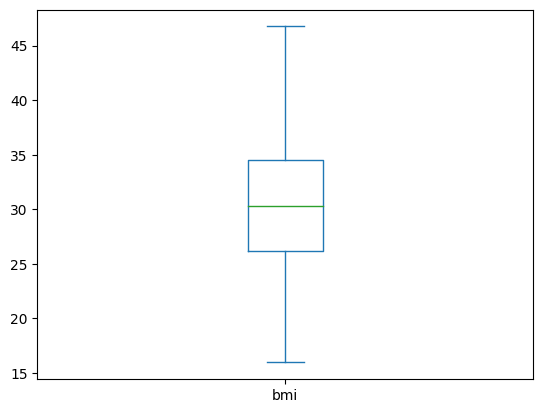

In [39]:
clean_df['bmi'].plot(kind = 'box')

-> here above box plot confirmed that there is no out layers in bmi column.

<Axes: ylabel='Density'>

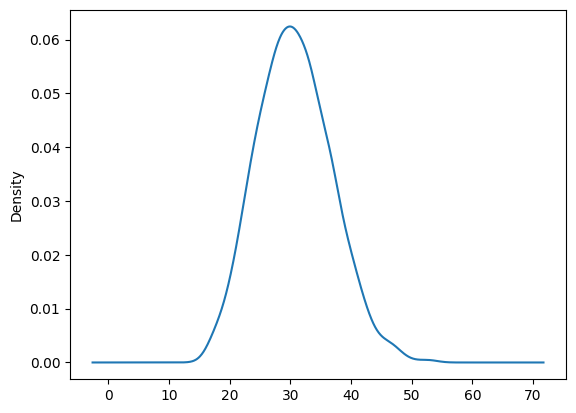

In [40]:
df['bmi'].plot(kind = 'kde')

-> Above kde plot shows that the bmi column is almost Symmetric.

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([15.96 , 16.815, 16.815, ..., 50.38 , 52.58 , 53.13 ])),
 (6.091222472679125, 30.66339686098655, 0.997081328942097))

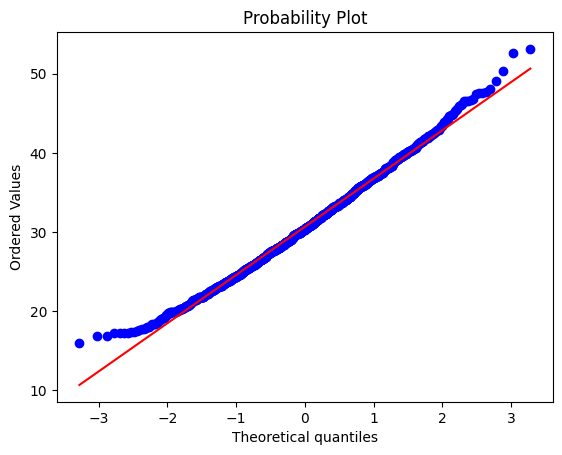

In [41]:
stats.probplot(df['bmi'],dist='norm',plot=plt)

-> After treated The outlayers in bmi column even though QQ plot shows that bmi column is not normally distrubuted.

Analysis on children column

In [42]:
print(df['children'].min())
print(df['children'].max())
print(df['children'].mean())
print(df['children'].median())
print(df['children'].std())

0
5
1.0949177877429
1.0
1.205492739781914


-> here mean and median are almost similar so there is a chances to no outlayers in children column.

<Axes: >

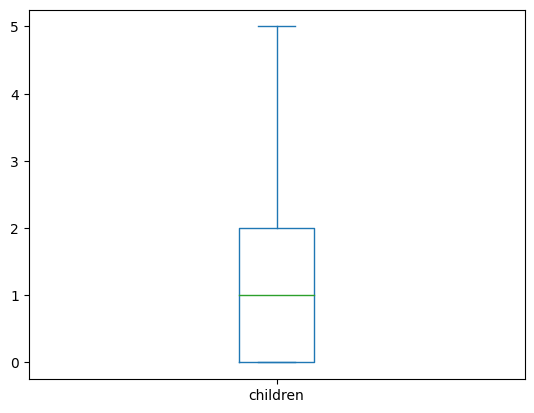

In [43]:
df['children'].plot(kind = 'box')

-> Here box plot shows that there is no outliers in children column.

<Axes: ylabel='Density'>

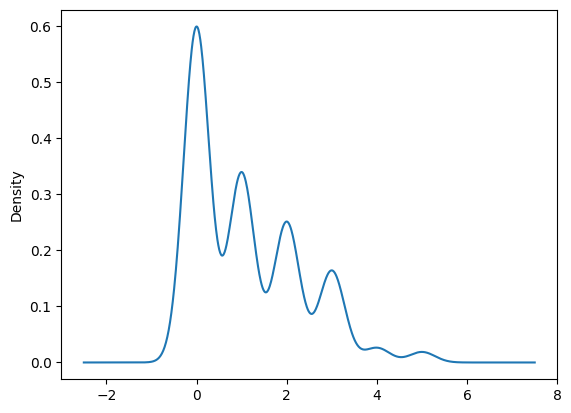

In [44]:
df['children'].plot(kind = 'kde')

-> The kde plot is not symmetric.

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([0, 0, 0, ..., 5, 5, 5])),
 (1.0962307471439772, 1.0949177877429002, 0.9077457693863357))

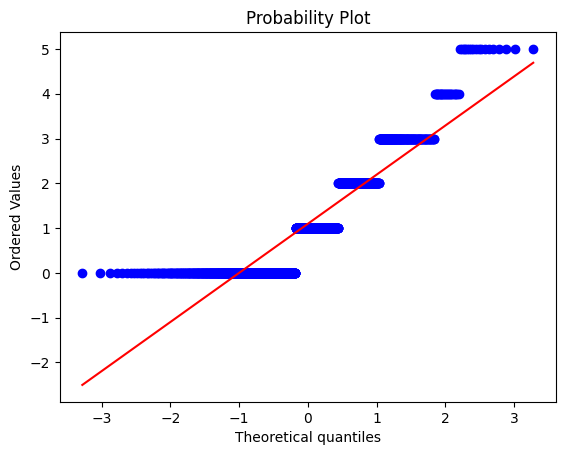

In [45]:
stats.probplot(df['children'],dist='norm',plot=plt)

=> Here  Mean and Median is close to each other but the above QQ-plot of children feature is not normally distributed.

Analysis on charges column

In [46]:
print('min:',df['charges'].min())
print('max:',df['charges'].max())
print('mean:',df['charges'].mean())
print('median:',df['charges'].median())
print('std:',df['charges'].std())

min: 1121.8739
max: 63770.42801
mean: 13270.422265141257
median: 9382.033
std: 12110.011236694001


-> Here mean and median are not simillar there are heavy outliers in charges column.

<Axes: >

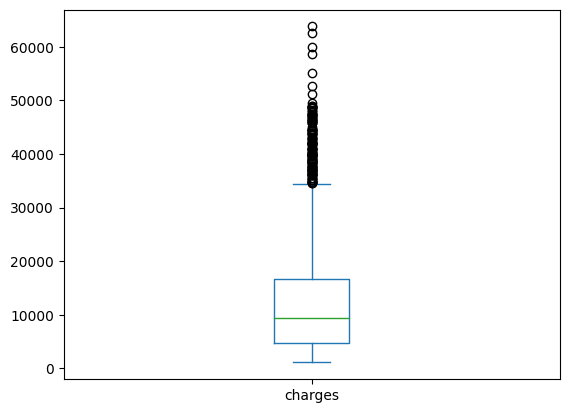

In [47]:
df['charges'].plot(kind = 'box')

-> The above plot shows that there are outliers.

<Axes: ylabel='Density'>

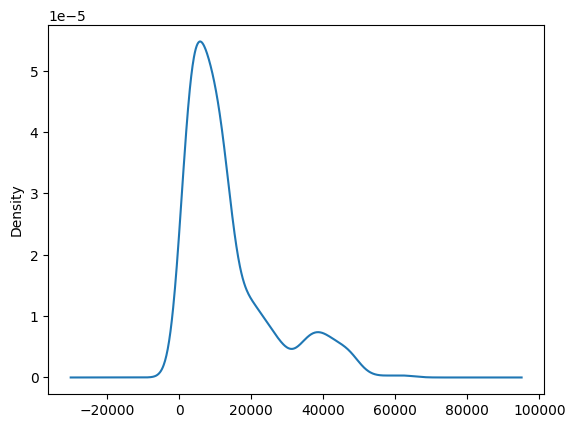

In [48]:
df['charges'].plot(kind = 'kde')

-> The kde plot of chage feature is not symmetric.

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([ 1121.8739 ,  1131.5066 ,  1135.9407 , ..., 60021.39897,
         62592.87309, 63770.42801])),
 (10952.462526491305, 13270.422265141258, 0.9028052656368237))

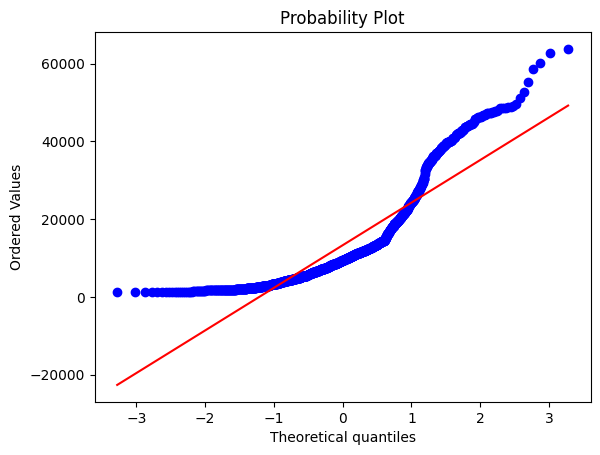

In [49]:
stats.probplot(df['charges'],dist='norm',plot=plt)

-> From the above graph we can conclude that the data points are not falling on 45 degree line,so the distribution is not a normal distribution.

## Univariant analysis -Categorical

**analysis on sex column**

In [50]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

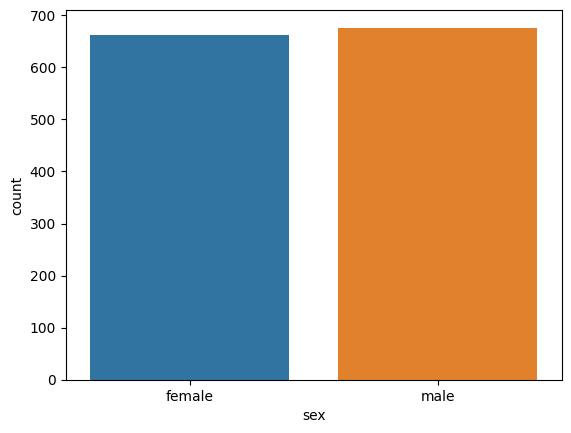

In [51]:
sns.countplot(x ='sex', data = df)

-> The sex column shows that how many female and males are presented in feature.     
->The number of females are 662 and the males are 676.

**Analysis on smoker column**

In [52]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

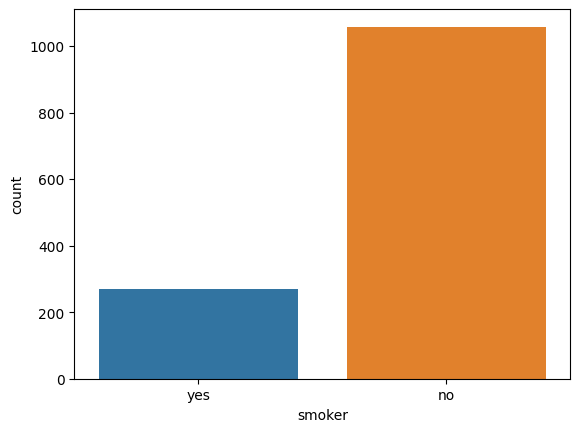

In [53]:
sns.countplot(x ='smoker', data = clean_df)

-> From the above plot we can observe the smoker count.     
->The highest percentage/count is for 'no',means there are very less members who are smoking.

**Analysing on region Column**

In [54]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Axes: xlabel='region', ylabel='count'>

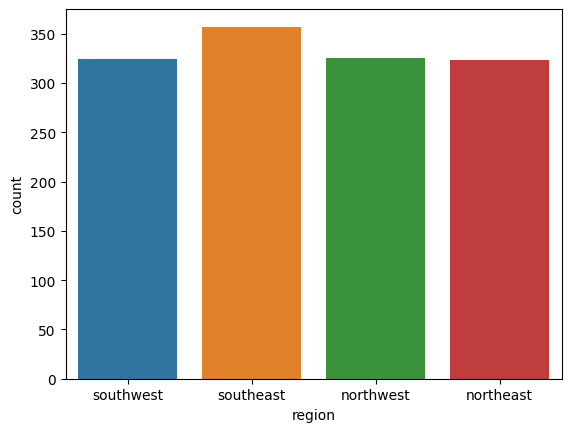

In [55]:
sns.countplot(x ='region', data = clean_df)

-> The highest count is ffor southeast region.
->almost the southwest,northwest and northeast regions are having same count.

## Bivariate analysis

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Numerical vs Numerical

**Relationship between age and charges**


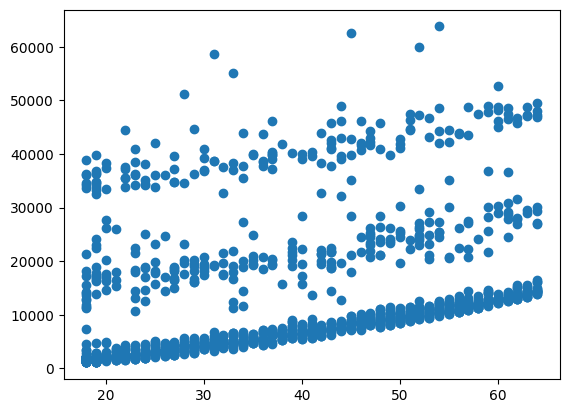

In [57]:
plt.scatter(x = df['age'],y = df['charges'])
plt.show()

=> There is a small relation between age and charges columns i.e when age increases charges also increases.

**Relationship between bmi and Charges**

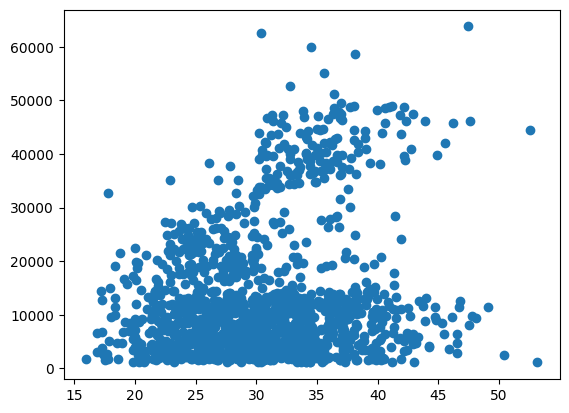

In [58]:
plt.scatter(df['bmi'], df['charges'])
plt.show()

we can observe here that there is no relationship between bmi and charges.


**Relationship between children and Charges**

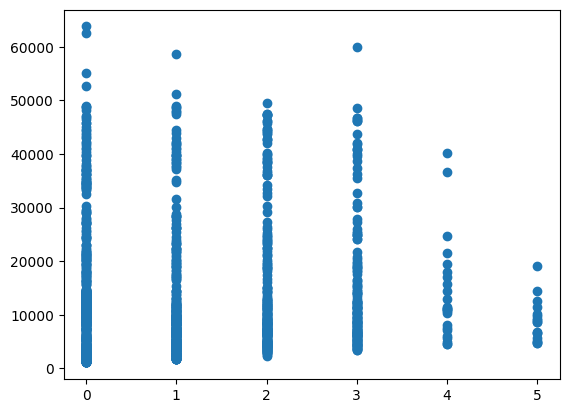

In [59]:
plt.scatter(df['children'], df['charges'])
plt.show()

-> we observed that, there is 
 a positive relationship between chlidren and charges

### Numerical vs categorical

**Relationship between sex and charges**

<Axes: xlabel='sex', ylabel='charges'>

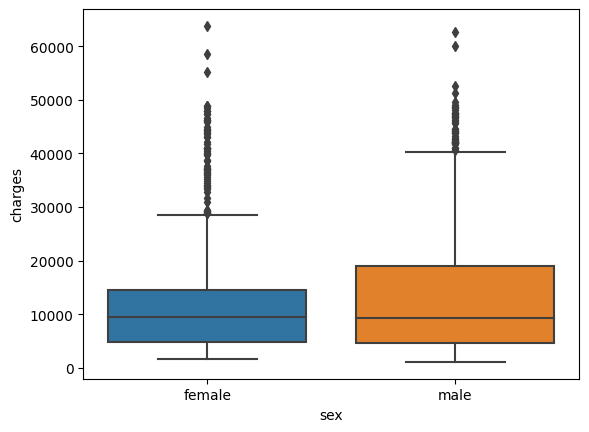

In [60]:
sns.boxplot(data = df, x='sex', y='charges')

-> from the above graph we can observe  that Compared to female , males are more charged.

**Relationship between smoker and charges**

<Axes: xlabel='smoker', ylabel='charges'>

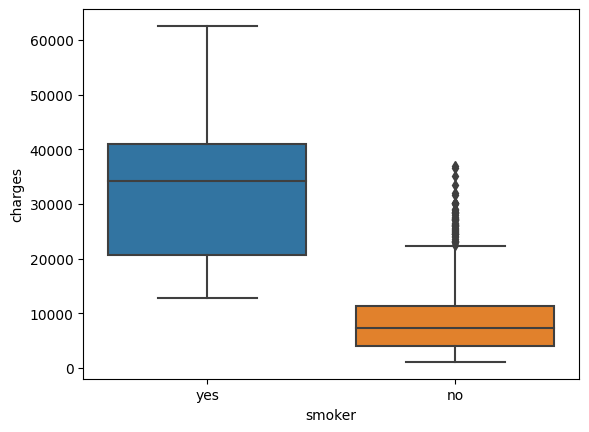

In [61]:
sns.boxplot(data = clean_df, x='smoker', y='charges')

-> From the above box plot we can observed that the people who are smoking will get more charged.

**Relationship between region and charges**

<Axes: xlabel='region', ylabel='charges'>

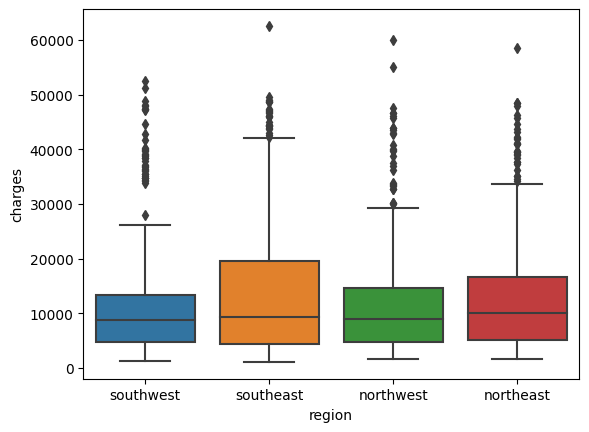

In [62]:
sns.boxplot(data = clean_df, x='region', y='charges')

-> Here southeast people are heavily charged when compared to other regions.

### Categorical vs Categorical

**Relation between region and sex**

<Axes: xlabel='region'>

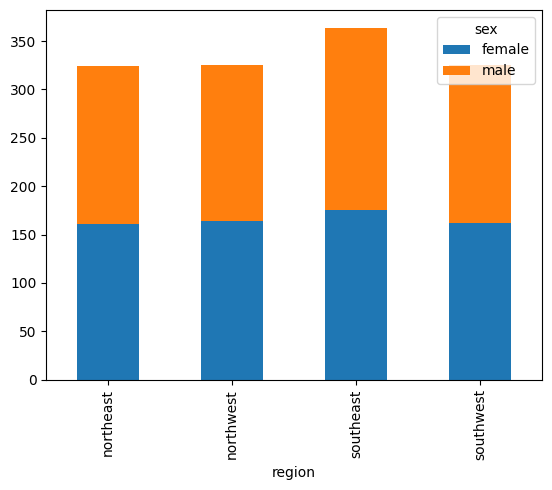

In [63]:
pd.crosstab(df['region'], df['sex']).plot(kind='bar', stacked=True)

-> From the above we can observe that the relation between the region and sex.  

-> The highest members are from southeast when it is compared to other regions.

**Relation between smoker and sex**

<Axes: xlabel='smoker'>

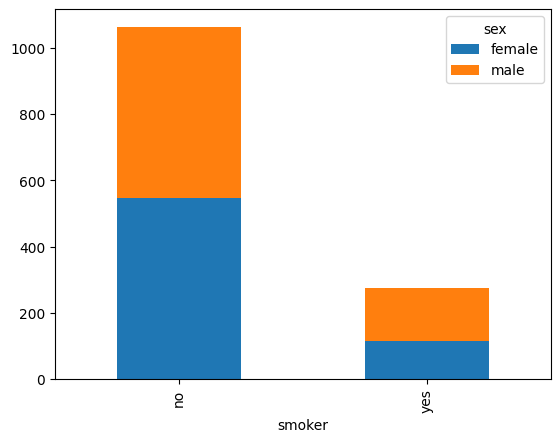

In [64]:
pd.crosstab(df['smoker'], df['sex']).plot(kind='bar', stacked=True)

-> From the above graph we can observe the relation between smoker and sex.    
-> Most of the people are not smoking.    
->Almost the females and males are having same count.

# Recommandations:

-> From the above analysis we can observe that:  

->Charges are on the higher side for males as compared to females but difference is not that much.     

->Premium charged from the smoker is around thrice that which is charged from non-smokers.     

->Charges are approximately the same in the given four regions.    

->A clear distinction can be observed here between the charges that smokers have to pay.     

->Men on average pay more than women when factoring in smoking and women pay more when considering non-smokers.